# **NAMED ENTITY RECOGNITION**
- Named Entity Recogntion (NER) is one of the NLP tasks used to identify named entities such as names of person, objects, places, organizations, geographical entities in a text  
- SpaCy is an open source library developed by Matthew Honnibal and Ines Montani designed to perform various NLP tasks such as text preprocessing, NER, dependancy parsing, Parts-of-Speech Tagging (POS tags) and much more.
- In this project, I have chosen to use this library to recognize the entities because spaCy uses Python and Cython to perform tasks faster due to C extension of python is being used.

- SpaCy can be downloaded by using the following command:
<br> python -m spacy download en_core_web_sm

In [ ]:
import spacy
from spacy import displacy
from collections import Counter

- DisplaCy is one of the many dependancy visualizer functions in spaCy's in built suite that shows POS tags and syntactic dependancies.

In [ ]:
from pprint import pprint

- Pprint is a python library used to "beautify" the representations of an object.

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

- nlp is a variable that is used to load the "en_core_web_sm" model.
- "en_core_web_sm" is an english model trained for NLP tasks.
- Various languages like French, German, Dutch, Chinese are supported by this library

### **Entity types supported by SpaCy:**
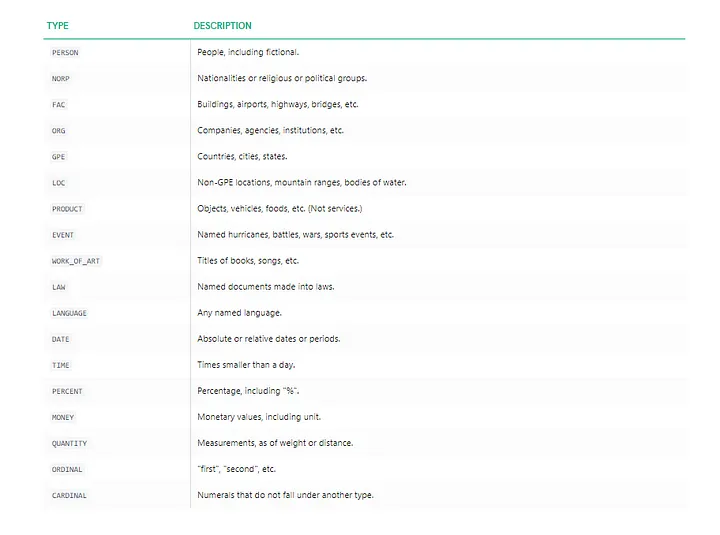

In [ ]:
doc = nlp('Moreover, Einstein wrote with great lucidity about the subject, so that it seemed as if he were speaking directly to us, a century later')
pprint([(X.text, X.label_) for X in doc.ents])

[('Einstein', 'PERSON'), ('a century later', 'DATE')]


- ".text" used for text attributes in a document
- ".label_" used for
- ".ents" used for named entities in a document
- ".ent_type_" is a named entity type
- ".ent_iob" is the IOB code of named entity tag.
 - Here, 3 = the token begins an entity, 2 = it is outside an entity, 1 = it is
   inside an entity, and 0 = no entity tag is set.

### **BILOU tagging scheme:**
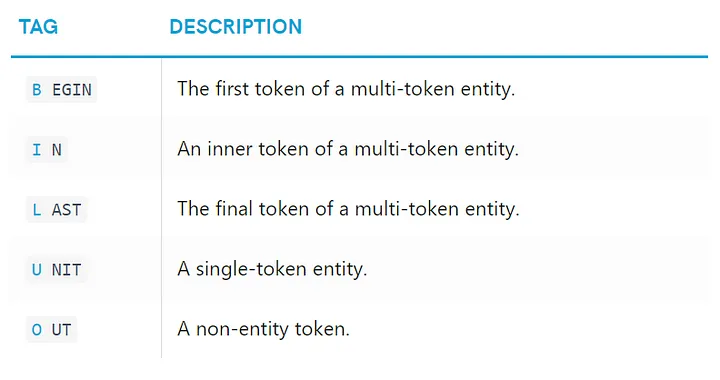

In [ ]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(Moreover, 'O', ''),
 (,, 'O', ''),
 (Einstein, 'B', 'PERSON'),
 (wrote, 'O', ''),
 (with, 'O', ''),
 (great, 'O', ''),
 (lucidity, 'O', ''),
 (about, 'O', ''),
 (the, 'O', ''),
 (subject, 'O', ''),
 (,, 'O', ''),
 (so, 'O', ''),
 (that, 'O', ''),
 (it, 'O', ''),
 (seemed, 'O', ''),
 (as, 'O', ''),
 (if, 'O', ''),
 (he, 'O', ''),
 (were, 'O', ''),
 (speaking, 'O', ''),
 (directly, 'O', ''),
 (to, 'O', ''),
 (us, 'O', ''),
 (,, 'O', ''),
 (a, 'B', 'DATE'),
 (century, 'I', 'DATE'),
 (later, 'I', 'DATE')]


The following paragraph is from the second paragraph of Chapter 24 "The Indian Comet"

In [ ]:
para = nlp("This letter to Albert Einstein from an unknown Indian scientist, received in early June, 1924, initiated one of the most extraordinary episodes in the modern history of science, culminating in his final historic contribution to the structure of the new quantum theory.")

In [ ]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in para])

[(This, 'O', ''),
 (letter, 'O', ''),
 (to, 'O', ''),
 (Albert, 'B', 'PERSON'),
 (Einstein, 'I', 'PERSON'),
 (from, 'O', ''),
 (an, 'O', ''),
 (unknown, 'O', ''),
 (Indian, 'B', 'NORP'),
 (scientist, 'O', ''),
 (,, 'O', ''),
 (received, 'O', ''),
 (in, 'O', ''),
 (early, 'B', 'DATE'),
 (June, 'I', 'DATE'),
 (,, 'I', 'DATE'),
 (1924, 'I', 'DATE'),
 (,, 'O', ''),
 (initiated, 'O', ''),
 (one, 'B', 'CARDINAL'),
 (of, 'O', ''),
 (the, 'O', ''),
 (most, 'O', ''),
 (extraordinary, 'O', ''),
 (episodes, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (modern, 'O', ''),
 (history, 'O', ''),
 (of, 'O', ''),
 (science, 'O', ''),
 (,, 'O', ''),
 (culminating, 'O', ''),
 (in, 'O', ''),
 (his, 'O', ''),
 (final, 'O', ''),
 (historic, 'O', ''),
 (contribution, 'O', ''),
 (to, 'O', ''),
 (the, 'O', ''),
 (structure, 'O', ''),
 (of, 'O', ''),
 (the, 'O', ''),
 (new, 'O', ''),
 (quantum, 'O', ''),
 (theory, 'O', ''),
 (., 'O', '')]


In [ ]:
len(para.ents)

4

In [ ]:
labels = [x.label_ for x in para.ents]
Counter(labels)

Counter({'PERSON': 1, 'NORP': 1, 'DATE': 1, 'CARDINAL': 1})

In [ ]:
pprint([(X.text, X.label_) for X in para.ents])

[('Albert Einstein', 'PERSON'),
 ('Indian', 'NORP'),
 ('early June, 1924', 'DATE'),
 ('one', 'CARDINAL')]


In [ ]:
items = [x.text for x in para.ents]
Counter(items).most_common(3)

[('Albert Einstein', 1), ('Indian', 1), ('early June, 1924', 1)]

In [ ]:
spacy.explain('NORP') # to understand what the entity label means

'Nationalities or religious or political groups'

In [ ]:
sentences = [x for x in para.sents]      # .sents property iterates over sentences
print(sentences[0])

This letter to Albert Einstein from an unknown Indian scientist, received in early June, 1924, initiated one of the most extraordinary episodes in the modern history of science, culminating in his final historic contribution to the structure of the new quantum theory.


#### **Visualizing the POS tags and dependancies**





In [ ]:
[(x.orth_,x.pos_, x.lemma_) for x in [y
                                      for y
                                      in nlp(str(sentences[0]))
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

# ".orth_" This text content exists mostly for consistency with the other attributes.
# ".pos_" represents a part-of-speech tag from the Universal POS tag set.
# ".lemma_" is the base form of the token, having no inflectional suffixes.

[('letter', 'NOUN', 'letter'),
 ('Albert', 'PROPN', 'Albert'),
 ('Einstein', 'PROPN', 'Einstein'),
 ('unknown', 'ADJ', 'unknown'),
 ('Indian', 'ADJ', 'indian'),
 ('scientist', 'NOUN', 'scientist'),
 ('received', 'VERB', 'receive'),
 ('early', 'ADJ', 'early'),
 ('June', 'PROPN', 'June'),
 ('1924', 'NUM', '1924'),
 ('initiated', 'VERB', 'initiate'),
 ('extraordinary', 'ADJ', 'extraordinary'),
 ('episodes', 'NOUN', 'episode'),
 ('modern', 'ADJ', 'modern'),
 ('history', 'NOUN', 'history'),
 ('science', 'NOUN', 'science'),
 ('culminating', 'VERB', 'culminate'),
 ('final', 'ADJ', 'final'),
 ('historic', 'ADJ', 'historic'),
 ('contribution', 'NOUN', 'contribution'),
 ('structure', 'NOUN', 'structure'),
 ('new', 'ADJ', 'new'),
 ('quantum', 'NOUN', 'quantum'),
 ('theory', 'NOUN', 'theory')]

In [ ]:
displacy.render(nlp(str(sentences[0])), style='dep', jupyter = True, options = {'distance': 120})

In [ ]:
# Visualizing the whole paragraph
displacy.render(nlp(str(sentences[0])), jupyter=True, style='ent')   # rendering a named entity visualization